In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv("../data/raw/loan_data.csv", header=1)

# Data Cleaning

In [80]:
df_cleaned = df.copy()

In [81]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [82]:
df_cleaned.shape

(30000, 25)

In [83]:
df_cleaned.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [84]:
df_cleaned.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

# Handling invalid caterogical columns

<Axes: xlabel='MARRIAGE'>

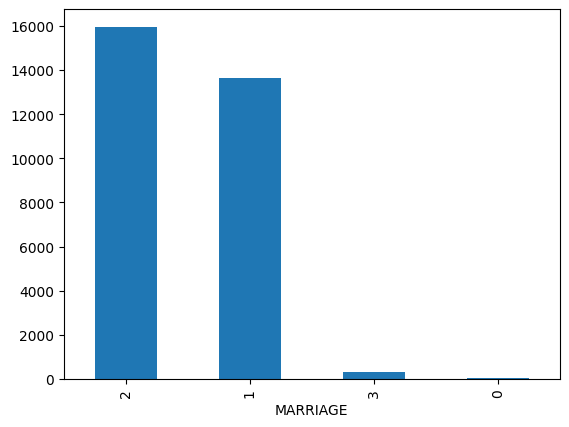

In [85]:
df_cleaned['MARRIAGE'].value_counts().plot(kind='bar')

In [86]:
df_cleaned['MARRIAGE'] = df_cleaned['MARRIAGE'].replace({0:3})
df_cleaned['MARRIAGE'] = df_cleaned['MARRIAGE'].map({1:'Married', 2:'Single', 3:'Others'})

<Axes: xlabel='MARRIAGE'>

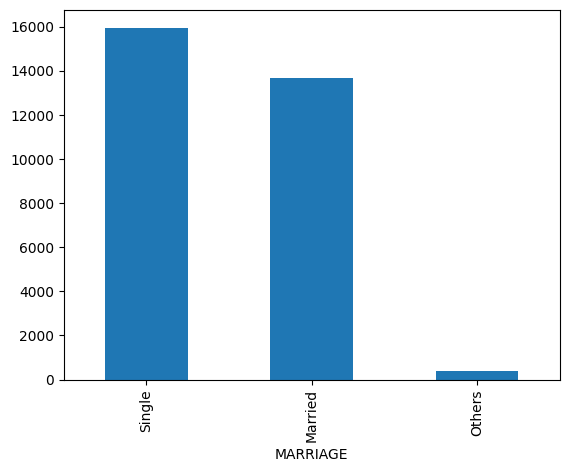

In [87]:
df_cleaned['MARRIAGE'].value_counts().plot(kind='bar')

In [88]:
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].replace({4:'Others',5:'Others',6:'Others',0:'Others'})
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].map({1:'Graduate', 2:'University', 3:'HighSchool', 'Others':'Others'})

<Axes: xlabel='EDUCATION'>

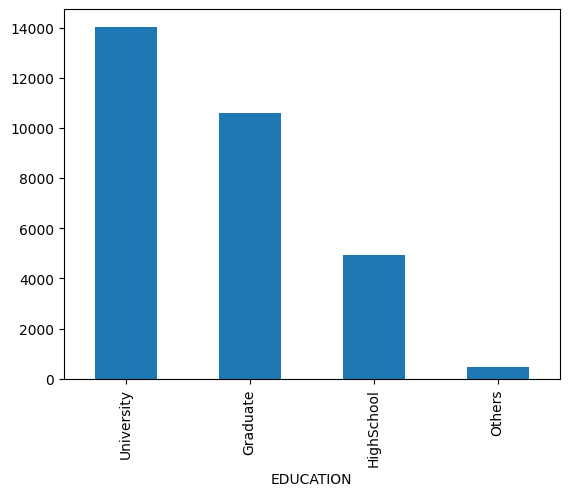

In [89]:
df_cleaned['EDUCATION'].value_counts().plot(kind='bar')

<Axes: xlabel='SEX'>

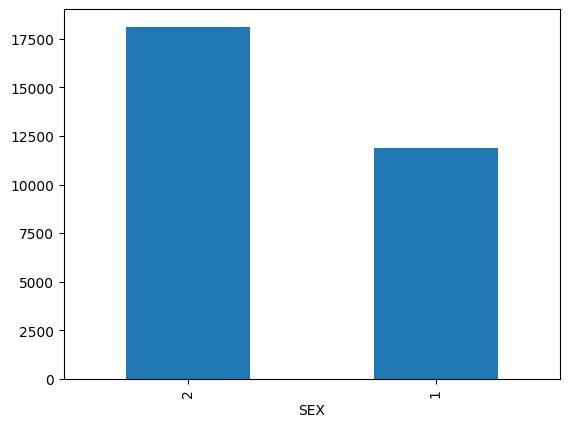

In [90]:
df_cleaned['SEX'].value_counts().plot(kind='bar')

In [91]:
df_cleaned['SEX'] = df_cleaned['SEX'].map({1:'Male', 2:'Female'})

<Axes: xlabel='SEX'>

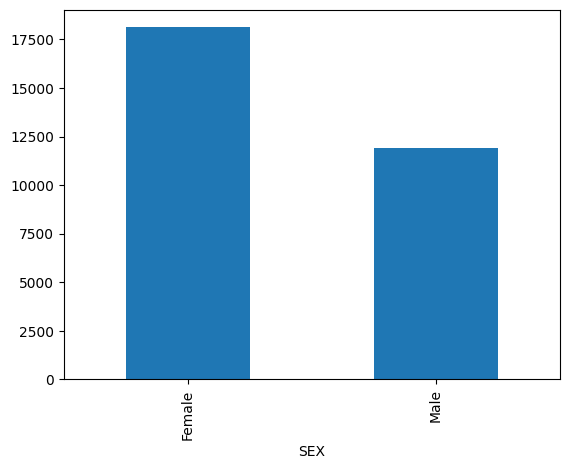

In [92]:
df_cleaned['SEX'].value_counts().plot(kind='bar')

# Encoding for the Model

In [93]:
df_cleaned['SEX'] = df_cleaned['SEX'].map({"Male":0, "Female":1})

In [94]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,1,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [95]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['EDUCATION'], drop_first=False)

In [96]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University
0,1,20000,1,Married,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,False,False,False,True
1,2,120000,1,Single,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,False,False,False,True
2,3,90000,1,Single,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,False,False,False,True
3,4,50000,1,Married,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,False,False,False,True
4,5,50000,0,Married,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,False,False,False,True


In [97]:
df_cleaned.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_Graduate',
       'EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University'],
      dtype='object')

In [98]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['MARRIAGE'], drop_first=False)

In [99]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,False,False,False,True,True,False,False
1,2,120000,1,26,-1,2,0,0,0,2,...,0,2000,1,False,False,False,True,False,False,True
2,3,90000,1,34,0,0,0,0,0,0,...,1000,5000,0,False,False,False,True,False,False,True
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,0,False,False,False,True,True,False,False
4,5,50000,0,57,-1,0,-1,0,0,0,...,689,679,0,False,False,False,True,True,False,False


In [100]:
df_cleaned = df_cleaned.astype(int)

In [101]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,1,1,0,0
1,2,120000,1,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,1,0,0,1
2,3,90000,1,34,0,0,0,0,0,0,...,1000,5000,0,0,0,0,1,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,0,0,0,0,1,1,0,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,689,679,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,5000,1000,0,0,1,0,0,1,0,0
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
29997,29998,30000,0,37,4,3,2,-1,0,0,...,2000,3100,1,0,0,0,1,0,0,1
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,52964,1804,1,0,1,0,0,1,0,0


# Feature Engineering and Extraction